<a name="A1">
    
# Analyse des ventes d'une librairie  
    

<br/>

**Configuration du Projet**
 - <a href="#C100">Importations des librairies Python et des données</a> 
 - <a href="#C101">Jonctions des données + Premières infos des données brutes</a>
    
    
**Nettoyage des données - Partie 1** 
 - <a href="#C200">Clients enregistrés sans achats</a>
 - <a href="#C201">Produits jamais achetés</a> 
 - <a href="#C202">Valeurs 'TEST'</a>  
 - <a href="#C203">Prix manquants</a>
 - <a href="#C205">Doublons</a>     
 - <a href="#C204">Erreur de TYPE</a>
 - <a href="#C206">Quelques vérifications</a>
    
    
**Nettoyage des données - Partie 2**
 - <a href="#C300">Analyse univariée : BIRTH</a>
 - <a href="#C301">Analyse univariée : PRICE</a>
 - <a href="#C302">Analyse univariée : CATEG</a>
 - <a href="#C303">Analyse bivariée : Client / Achat</a>    
 - <a href="#C304">Analyse bivariée : Date / Vente</a>
   
    
**Finalisation**
 - <a href="#C400">Export CSV BASE LAPAGE</a>
 - <a href="#C401">Export CSV BASE VIDE</a>
 - <a href="#C402">Export CSV BASE 4 Clients</a>   
    
<br/>
    
**Valentin GARCIA**
    
<br/>

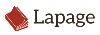

----------------------------------------
<font color='green'>

## Configuration du Projet

<a name="C100">
<br/> 
--------------------------------------------------------------------------------------------------------------------------


### Importations des librairies Python et des données
<br/> 
>>> <a href="#A1"> Retour sommaire



In [1]:
# Importation des librairies Python utiles au projet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
from matplotlib.gridspec import GridSpec

# Paramétrage Matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# Gestion défaut mineur
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter("ignore")

# Importation des fichiers de données (ici csv)
customers = pd.read_csv('2 - BDD/customers.csv')
products = pd.read_csv('2 - BDD/products.csv')
transactions = pd.read_csv('2 - BDD/transactions.csv')

<a name="C101">
<br/> 
---------------------------------------------------------------------------------------------------------------------------


### Jonctions des données + Premières infos des données brutes
<br/> 
>>> <a href="#A1"> Retour sommaire

In [2]:
# Infos sur la DataFrame CUSTOMERS
print('---------------- Info globale dataframe CUSTOMERS ---------------- \n')
customers.info()
print('\n-------- Nombre de doublons dans la clef primaire :',len(customers.index) - customers[customers.columns[0]].nunique(),'----------- \n')

---------------- Info globale dataframe CUSTOMERS ---------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB

-------- Nombre de doublons dans la clef primaire : 0 ----------- 



In [3]:
# Infos sur la DataFrame PRODUCTS

print('----------------- Info globale dataframe PRODUCTS ----------------- \n')
products.info()
print('\n-------- Nombre de doublons dans la clef primaire :',len(products.index) - products[products.columns[0]].nunique(),'--------------')
print('-------- Les différentes de catégorie de produit :', products['categ'].unique(),' -------- \n')

----------------- Info globale dataframe PRODUCTS ----------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB

-------- Nombre de doublons dans la clef primaire : 0 --------------
-------- Les différentes de catégorie de produit : [0 1 2]  -------- 



In [4]:
# Infos sur la DataFrame TRANSACTIONS

print('----------------- Info globale dataframe TRANSACTIONS ----------------- \n')
transactions.info()

----------------- Info globale dataframe TRANSACTIONS ----------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [5]:
# Test de la jonction CUSTOMERS et TRANSACTIONS avec indicateur
test_1 = pd.merge(customers , transactions, on = 'client_id', how = 'outer', indicator = True)
test_1['_merge'].unique()

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [6]:
# Test de la jonction PRODUCTS et TRANSACTIONS avec indicateur
test_2 = pd.merge(products , transactions, on = 'id_prod', how = 'outer', indicator = True)
test_2['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [7]:
# Jonction des 3 CSV (avec OUTER)
jonction_1 = pd.merge(customers , transactions, how = 'outer', on = 'client_id')
base = pd.merge(products , jonction_1, how = 'outer', on = 'id_prod')
base.head(3)

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0.0,c_2167,f,1960.0,2022-08-24 00:28:06.088699,s_257560


=========>   Nom de la DataFrame créée : BASE

----------------------------------------
<font color='green'>

## Nettoyage des données - Partie 1


In [8]:
# Informations dataframe BASE
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679574 entries, 0 to 679573
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679553 non-null  object 
 1   price       679332 non-null  float64
 2   categ       679332 non-null  float64
 3   client_id   679553 non-null  object 
 4   sex         679553 non-null  object 
 5   birth       679553 non-null  float64
 6   date        679532 non-null  object 
 7   session_id  679532 non-null  object 
dtypes: float64(3), object(5)
memory usage: 46.7+ MB


In [9]:
# Création fonction VIDE

def vide (dataframe) :
    """
    Fonction qui retourne les valeurs Manquantes de chaque colonne de la Dataframe
    """
    for i in range(len(dataframe.columns)):
            vide = dataframe[dataframe.columns[i]].isnull().sum()
            print('    -> nom de la colonne :  <',dataframe.columns[i],'>  avec',vide,'valeurs manquantes')

# Exemple utilisation avec la dataframe BASE            
vide(base)

    -> nom de la colonne :  < id_prod >  avec 21 valeurs manquantes
    -> nom de la colonne :  < price >  avec 242 valeurs manquantes
    -> nom de la colonne :  < categ >  avec 242 valeurs manquantes
    -> nom de la colonne :  < client_id >  avec 21 valeurs manquantes
    -> nom de la colonne :  < sex >  avec 21 valeurs manquantes
    -> nom de la colonne :  < birth >  avec 21 valeurs manquantes
    -> nom de la colonne :  < date >  avec 42 valeurs manquantes
    -> nom de la colonne :  < session_id >  avec 42 valeurs manquantes


In [10]:
# Suppression lignes entièrement NaN ou somme=0
base = base.dropna(axis = 0 , how = 'all')
base = base.loc[base.sum( axis = 1 ) != 0]

<a name="C200">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Clients enregistrés sans achats
<a href="#A1"> Retour sommaire

In [11]:
# Recherche des valeurs manquantes dans ID_PROD et SESSION_ID
client_vide = base.loc[base['id_prod'].isnull() & base['session_id'].isnull(),:]
client_vide.head(3)

,id_prod,price,categ,client_id,sex,birth,date,session_id
679553,NaN,NaN,NaN,c_8253,f,2001.0,NaN,NaN
679554,NaN,NaN,NaN,c_3789,f,1997.0,NaN,NaN
679555,NaN,NaN,NaN,c_4406,f,1998.0,NaN,NaN


<font color='green'>  

**Choix de nettoyage :**  
Suppression de ces 21 lignes correspondant aux clients qui n'ont rien acheté 



_pas d'intérêt pour l'étude_


In [12]:
base.drop(client_vide.index , inplace = True)

<a name="C201">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Produits jamais achetés
<a href="#A1"> Retour sommaire

In [13]:
# Recherche valeurs manquantes dans CLIENT_ID
produit_vide = base.loc[base['client_id'].isnull() ,:]
produit_vide.head(3)

,id_prod,price,categ,client_id,sex,birth,date,session_id
39705,0_1016,35.06,0.0,NaN,NaN,NaN,NaN,NaN
62805,0_1780,1.67,0.0,NaN,NaN,NaN,NaN,NaN
162965,0_1062,20.08,0.0,NaN,NaN,NaN,NaN,NaN


<font color='green'>  

**Choix de nettoyage :**  
Suppression de ces 21 valeurs manquantes (achat non réalisé) de la base de donnée étudiée



**Mais conservation de la dataframe créée pour utilisation ultéreure à l'étude**   
=> pour les demandes demandes d'Antoine (les flops) : export CSV de la DataFrame

In [14]:
base.drop(produit_vide.index , inplace = True)

<a name="C202">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Valeurs 'TEST'
<a href="#A1"> Retour sommaire

In [15]:
# Recherche du mot 'test' qui apparait de la colonne date
base_test = base[base['date'].str.contains("test")]
base_test.head(10)
print('-----   Dataframe contenant le mot TEST dans la colonne DATE    -----\n')
print('Différents type de prix dans la DataFrame TEST créée :',base_test['price'].unique(),' -> c\'est une valeur aberrante')

# Étude du mois de l'étude du TEST avec création colonne et manipulation str
base_test['etude date'] = base_test['date'].str.slice(5, 15)
print('    => Ces TEST ont été réalisé à la date suivante :',base_test['etude date'].unique())
print('    => Nombre de lignes concernées :',len(base_test.index),'\n')

base_test.head(3)

-----   Dataframe contenant le mot TEST dans la colonne DATE    -----

Différents type de prix dans la DataFrame TEST créée : [-1.]  -> c'est une valeur aberrante
    => Ces TEST ont été réalisé à la date suivante : ['2021-03-01']
    => Nombre de lignes concernées : 200 



,id_prod,price,categ,client_id,sex,birth,date,session_id,etude date
162679,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237419,s_0,2021-03-01
162680,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237425,s_0,2021-03-01
162681,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237436,s_0,2021-03-01


<font color='green'>  

**Choix de nettoyage :**  
Suppression de ces 200 lignes de tests effectués le 1er mars 2021

In [16]:
base.drop(base_test.index , inplace = True)

<a name="C203">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Prix manquants
<a href="#A1"> Retour sommaire

In [17]:
# Recherche Nan dans PRICE
base_pu_vide = base[base['price'].isna()]
vide(base_pu_vide)
print('\nIl manque le prix de l\'article :', base_pu_vide['id_prod'].unique())

# Recherche de l'article 0_2245 dans toute la base de donnée
print('    => Nombre d\'article 0_2245 dans la BDD principale :',base.loc[base['id_prod'] == '0_2245']['id_prod'].count())
print('Impossible de récupérer le prix ailleurs dans la base de donnée principale')


    -> nom de la colonne :  < id_prod >  avec 0 valeurs manquantes
    -> nom de la colonne :  < price >  avec 221 valeurs manquantes
    -> nom de la colonne :  < categ >  avec 221 valeurs manquantes
    -> nom de la colonne :  < client_id >  avec 0 valeurs manquantes
    -> nom de la colonne :  < sex >  avec 0 valeurs manquantes
    -> nom de la colonne :  < birth >  avec 0 valeurs manquantes
    -> nom de la colonne :  < date >  avec 0 valeurs manquantes
    -> nom de la colonne :  < session_id >  avec 0 valeurs manquantes

Il manque le prix de l'article : ['0_2245']
    => Nombre d'article 0_2245 dans la BDD principale : 221
Impossible de récupérer le prix ailleurs dans la base de donnée principale


<font color='green'>  

**Choix de nettoyage :**  
L'article 0_2245 est réénitialisé à la moyenne des prix et dans la CATEG = 0 

Nota : après étude univariée des outliers sur PRICE, l'article 0_2245 n'a pas eu besoin d'être réajusté

In [18]:
# Remplacement des NaN dans PRICE avec moyenne des PRICE
base['price'].fillna(base['price'].mean(), inplace=True)

# Remplacement des NaN dans CATEG par 0
base['categ'].fillna(0, inplace=True)

<a name="C205">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Doublons
<a href="#A1"> Retour sommaire

In [19]:
# Vérification doublons ligne entière
base_doublon_1 = base.loc[base[['id_prod', 'price', 'categ', 'client_id','sex','birth','date','session_id']].duplicated(keep=False),:]
print('Nombre de lignes compléte en double :', base_doublon_1['id_prod'].count())

# Vérification doublons sur Date + client + livre
base_doublon_2 = base.loc[base[['id_prod', 'client_id','date']].duplicated(keep=False),:]
print('Nombre de doublons sur CLIENT_ID avec DATE et ID_PROD :', base_doublon_2['id_prod'].count())


Nombre de lignes compléte en double : 0
Nombre de doublons sur CLIENT_ID avec DATE et ID_PROD : 0


<font color='green'>  

**Choix de nettoyage :**  
RAS sur les doublons

<a name="C204">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Erreur de TYPE
<a href="#A1"> Retour sommaire

In [20]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679552
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   price       679332 non-null  float64
 2   categ       679332 non-null  float64
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  float64
 6   date        679332 non-null  object 
 7   session_id  679332 non-null  object 
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


In [21]:
# Rectification des Types sur CATEG, BIRTH, DATE et PRICE
base['categ'] = base['categ'].astype(int)
base['birth'] = base['birth'].astype(int)
base['date'] = pd.to_datetime(base['date'])
base['date'] = pd.to_datetime(base['date'].dt.date)
base['price'] = base['price'].astype(float).round(2)

print('NOTA 1 : arrondi à 2 chiffres après la virgule sur PRICE (il y avait un pb sur categ 0)')


NOTA 1 : arrondi à 2 chiffres après la virgule sur PRICE (il y avait un pb sur categ 0)


<font color='green'>  

**Choix de nettoyage :**  
Rectification des Types sur CATEG, BIRTH, DATE et PRICE

<a name="C206">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Quelques vérifications
<a href="#A1"> Retour sommaire

In [22]:
# Vérifications données
print('Données uniques sur colonne SEX :',base['sex'].unique())
print('Données uniques sur colonne CATEG :',base['categ'].unique(),'\n')

# Nombre de valeurs uniques
print('Nombre valeur unique dans ID_PROD    :',base['id_prod'].nunique(),'  = au nombre de produit')
print('Nombre valeur unique dans CLIENT_ID  :',base['client_id'].nunique(),'  = au nombre de client')
print('Nombre valeur unique dans SESSION_ID :',base['session_id'].nunique(),'= au nombre de session d\'achat (plusieurs livres par session possible)')

Données uniques sur colonne SEX : ['f' 'm']
Données uniques sur colonne CATEG : [0 1 2] 

Nombre valeur unique dans ID_PROD    : 3266   = au nombre de produit
Nombre valeur unique dans CLIENT_ID  : 8600   = au nombre de client
Nombre valeur unique dans SESSION_ID : 342315 = au nombre de session d'achat (plusieurs livres par session possible)


----------------------------------------
<font color='green'>

## Nettoyage des données - Partie 2


<a name="C300">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Analyse univariée : BIRTH
<a href="#A1"> Retour sommaire

In [23]:
# Première vérification
base['birth'].describe()

count    679332.000000
mean       1977.811139
std          13.574553
min        1929.000000
25%        1970.000000
50%        1980.000000
75%        1987.000000
max        2004.000000
Name: birth, dtype: float64

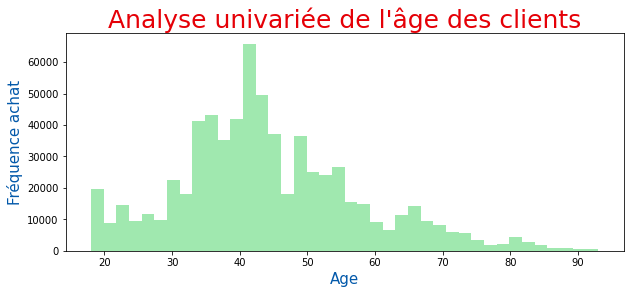

In [24]:
# Création colonne AGE (calcul avec année de naissance)
annee_actuelle = 2022
base['age'] = annee_actuelle - base['birth']

# Graphique en barre 
base['age'].plot(kind='hist', bins = 40, color = '#A0E8AF', grid = False, figsize = (10,4), legend = False)
plt.title("Analyse univariée de l'âge des clients", color = '#E50007', fontsize = 25)
plt.xlabel("Age", color = '#0359AA', fontsize = 15)
plt.ylabel("Fréquence achat", color = '#0359AA', fontsize = 15)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_univariée_age.png",dpi=100) 
plt.show()

<font color='green'>  

**Conclusion N°1 sur AGE :**  
=> pas d'Outliers sur AGE  
On retrouve une "quasi" forme de courbe de Gauss centrée autour des 35-45 ans  
A noter un pic sur les 18 ans

In [25]:
# Visualisation DataFrame Nombre de client par age
etude_18_ans = base.groupby(['age'], as_index = False)['age'].size()
etude_18_ans.head(5)

,age,size
0,18,15149
1,19,4371
2,20,4587
3,21,4252
4,22,4415


<font color='green'>  

**Conclusion N°2 sur AGE :**  
les 18 ans sont sur-représentés  
=> Ce qui dois correspondre à des achats de personnes inférieur à 18 ans et qui se déclare majeur    
 <br>   
    
**Choix de nettoyage**  
Conservation des achats des 18 ans en imaginant une tranche d'âge de '14-18 ans' par exemple pour la suite de l'étude

<a name="C301">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Analyse univariée : PRICE
<a href="#A1"> Retour sommaire

In [26]:
# Première vérification
print(base['price'].describe(),
      '\n \n=> écart-type fort = les valeurs sont dispersées autour de la moyenne (série hétérogène)',
     '\n=> pas d\'outliers visibles sur les prix extrèmes')

count    679332.000000
mean         17.454772
std          18.326016
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64 
 
=> écart-type fort = les valeurs sont dispersées autour de la moyenne (série hétérogène) 
=> pas d'outliers visibles sur les prix extrèmes


In [27]:
# Création DataFrame regrupement uniquement les références avec leurs prix et catégorie + Tri descendant
prix = base.groupby(['id_prod','price','categ'], as_index = False).size()
prix = prix.sort_values('price', ascending = False)
prix

,id_prod,price,categ,size
3142,2_2,300.00,2,15
3242,2_76,254.44,2,9
3096,2_158,247.22,2,142
3106,2_167,236.99,2,189
3193,2_30,233.54,2,7
...,...,...,...,...
401,0_1364,0.81,0,19
929,0_1844,0.77,0,5
220,0_120,0.66,0,15
1125,0_202,0.62,0,9


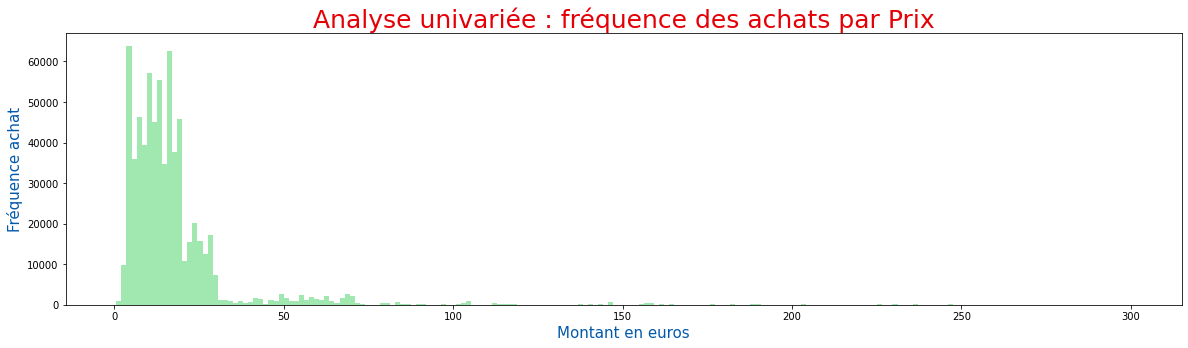

In [28]:
# Graph
base['price'].plot(kind='hist', bins = 200, color = '#A0E8AF', grid = False, figsize = (20,5), legend = False)
plt.title("Analyse univariée : fréquence des achats par Prix", color = '#E50007', fontsize = 25)
plt.xlabel("Montant en euros", color = '#0359AA', fontsize = 15)
plt.ylabel("Fréquence achat", color = '#0359AA', fontsize = 15)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_univariée_fréquence_achats.png",dpi=100) 
plt.show()

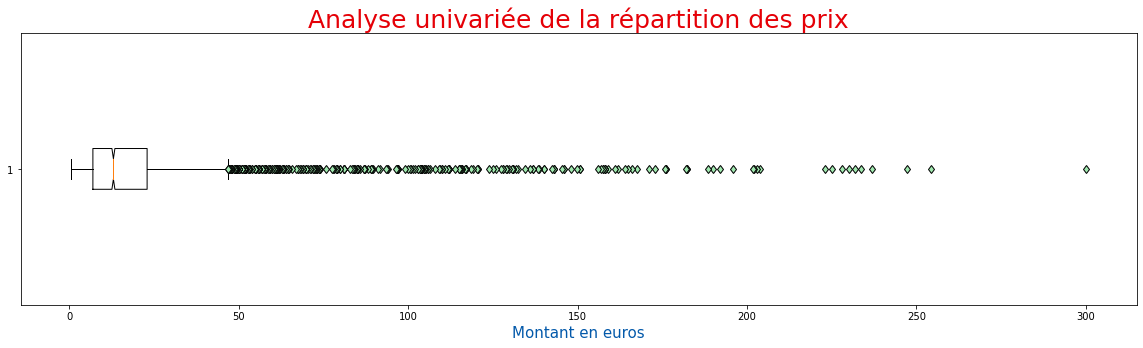

In [29]:
# Graph
forme = dict(markerfacecolor='#A0E8AF', marker='d')
plt.subplots(figsize=(20, 5))
plt.title("Analyse univariée de la répartition des prix", color = '#E50007', fontsize = 25)
plt.xlabel("Montant en euros", color = '#0359AA', fontsize = 15)
plt.boxplot(prix['price'], notch=True, vert=False , flierprops = forme)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_univariée_PRICE.png",dpi=100) 
plt.show()

<font color='green'>  

**Conclusion**   
répartinion hétérogène, distribution étalée à gauche (plus de petits prix)  
pas d'Outliers sur PRICE, uniquement des valeurs atypiques (exemple un livre à 300€, certainement de collection, acheté 15 fois)

<a name="C302">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Analyse univariée : CATEG
<a href="#A1"> Retour sommaire

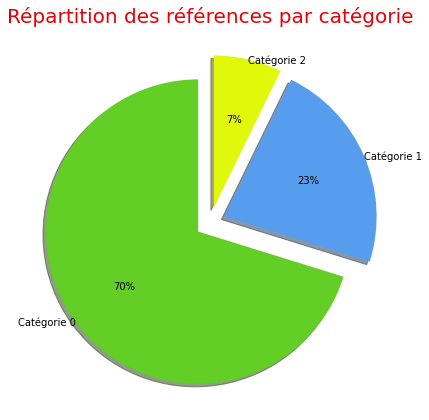

Pour categ 0, le nombre de référence est de : 2293
Pour categ 1, le nombre de référence est de : 737
Pour categ 2, le nombre de référence est de : 236


In [30]:
# Comptage du nombre de références par CATEG 
categ_0 = base.loc[base['categ'] == 0]['id_prod'].nunique()
categ_1 = base.loc[base['categ'] == 1]['id_prod'].nunique()
categ_2 = base.loc[base['categ'] == 2]['id_prod'].nunique()

titre = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
donnees = [categ_0, categ_1, categ_2]
couleurs = ("#63CE26", "#579DED", "#E0F90B")
explode = (0.1, 0.1, 0.1)
plt.subplots(figsize=(7, 7))
plt.pie(donnees, labels = titre, autopct = '%1.0f%%' , shadow = True, labeldistance = 1, explode = explode, colors = couleurs, startangle = 90)
plt.title("Répartition des références par catégorie", color = '#E50007', fontsize = 20, pad = 10)

plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Répartition_référence_catégorie.png",dpi=100) 
plt.show()

print('Pour categ 0, le nombre de référence est de :',categ_0)
print('Pour categ 1, le nombre de référence est de :',categ_1)
print('Pour categ 2, le nombre de référence est de :',categ_2)

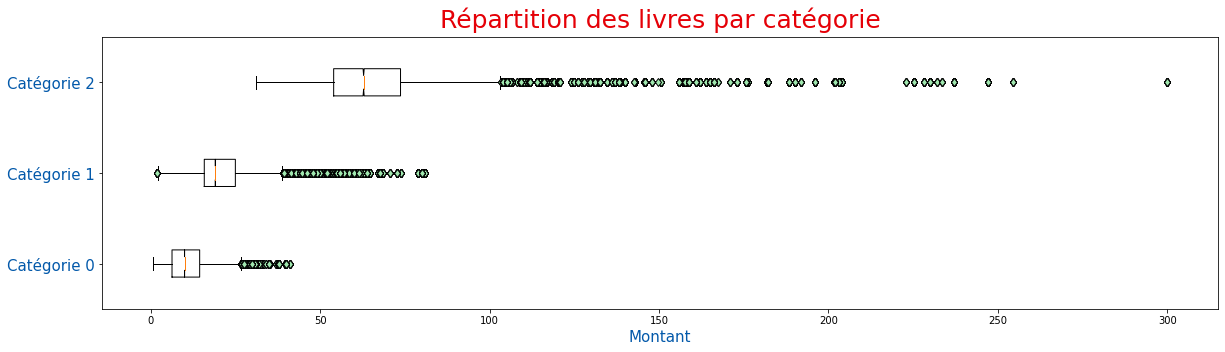

In [31]:
# Création DataFrame CA par CATEG
categ_0_ca = base.price.loc[base['categ'] == 0]
categ_1_ca = base.price.loc[base['categ'] == 1]
categ_2_ca = base.price.loc[base['categ'] == 2]

# BoxPlot
donnee = [categ_0_ca, categ_1_ca, categ_2_ca]
plt.subplots(figsize=(20, 5))
plt.boxplot(donnee, notch=True, vert=False , flierprops = dict(markerfacecolor='#A0E8AF', marker='d'))
plt.title("Répartition des livres par catégorie", color = '#E50007', fontsize = 25, pad = 10)
plt.xlabel("Montant", color = '#0359AA', fontsize = 15)
plt.yticks([1, 2, 3], ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], fontsize = 15 , color = '#0359AA')
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Répartition_livre_catégorie",dpi=100) 
plt.show()

<font color='green'>  

**Conclusion**  
répartinion hétérogène mais pas d'outlier

<a name="C303">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Analyse bivariée : Client / Achat
<a href="#A1"> Retour sommaire

In [32]:
# Création DataFrame avec montant total et nombre d'achat par client 
somme_achat_client = base.groupby(['client_id'], as_index = False).agg(montant = ('price' , 'sum') , nombre = ('price' , 'count'))

# Tri descendant sur montant
somme_achat_client = somme_achat_client.sort_values('montant', ascending = False)

# Vérification
somme_achat_client.head(10)

,client_id,montant,nombre
677,c_1609,324033.35,25488
4388,c_4958,289760.34,5195
6337,c_6714,153703.62,9187
2724,c_3454,113690.28,6773
2513,c_3263,5276.87,403
634,c_1570,5271.62,369
2108,c_2899,5214.05,105
1268,c_2140,5208.82,402
7006,c_7319,5155.77,371
7791,c_8026,5100.03,377


<font color='green'>  

**1ère conclusion sur Client/Achat**  
4 clients semblent sortir du lot avec des commande de 20 à 60 fois supérieur  
=> Je pense que ça va fausser **l'étude d'Antoine et de Julie**. Je choisie de retirer ces 4 clients et je divise en 2 la dataframe en concervant BASE comme DataFrame principale et je crée une 2e DataFrame avec uniquement ces 4 clients (au besoin pour une autre étude)

In [33]:
# Création df des 4 clients en Outlier
outlier_client = somme_achat_client.loc[somme_achat_client['nombre'] > 1000 , :]

# Suppression des 4 clients en Outlier de SOMME_ACHAT_CLIENT
outlier_client_liste = outlier_client['client_id'].tolist()
outlier_client_liste
somme_achat_client = somme_achat_client[ ~ somme_achat_client['client_id'].isin(outlier_client_liste)]

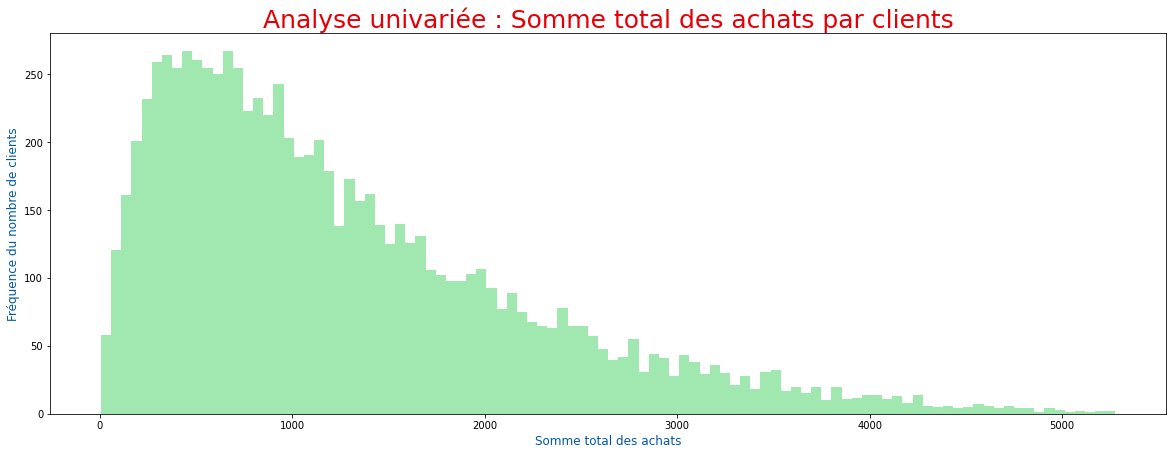

In [34]:
somme_achat_client['montant'].plot(kind='hist', bins = 100, color = '#A0E8AF', grid = False, figsize = (20,7))
                                      
plt.title("Analyse univariée : Somme total des achats par clients", color = '#E50007', fontsize = 25)
plt.xlabel("Somme total des achats", color = '#0359AA', fontsize = 12)
plt.ylabel("Fréquence du nombre de clients", color = '#0359AA', fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_univariée_Somme_achats_par_client.png",dpi=100) 
plt.show()

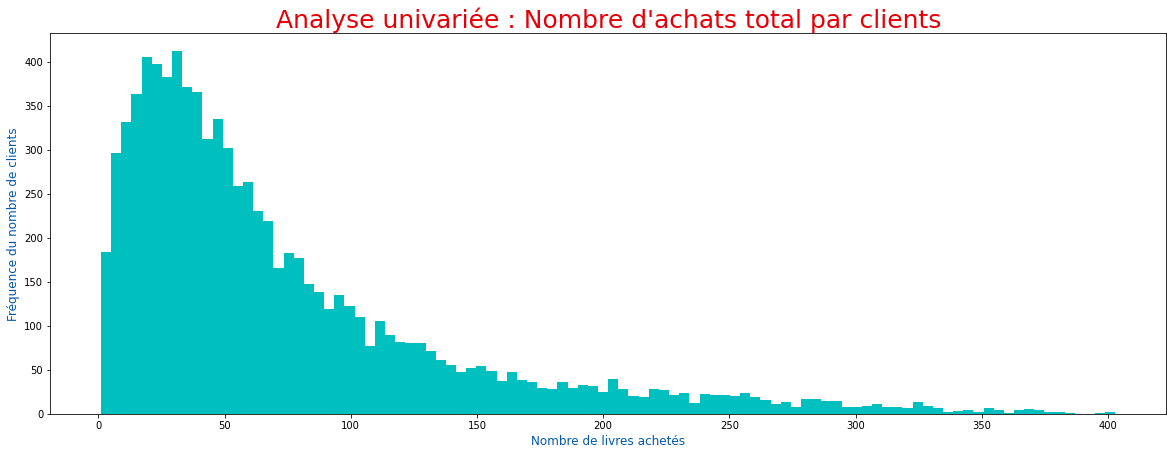

In [35]:
somme_achat_client['nombre'].plot(kind='hist', bins = 100, color = 'c', grid = False, figsize = (20,7))
                   
plt.title("Analyse univariée : Nombre d'achats total par clients", color = '#E50007', fontsize = 25)
plt.xlabel("Nombre de livres achetés", color = '#0359AA', fontsize = 12)
plt.ylabel("Fréquence du nombre de clients", color = '#0359AA', fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_univariée_Nombre_achat_client.png",dpi=100) 
plt.show()

In [36]:
# Création de BASE_CLIENT_OUTLIER pour étude éventuelle
base_client_outlier = base[base['client_id'].isin(outlier_client_liste)]
base_client_outlier.shape

(46643, 9)

In [37]:
# Vérification du nombre d'achat d'un même livre dans BASE_CLIENT_OUTLIER
meme_livre_outlier = base_client_outlier.groupby(['id_prod','price','client_id'], as_index = False).size()
meme_livre_outlier = meme_livre_outlier.sort_values('size', ascending = False)
meme_livre_outlier.head(10)

,id_prod,price,client_id,size
967,0_1438,9.31,c_1609,95
4818,2_39,57.99,c_4958,94
4815,2_37,48.99,c_4958,93
4631,2_110,62.25,c_4958,89
4628,2_109,53.99,c_4958,85
4767,2_209,69.99,c_4958,84
4635,2_112,67.57,c_4958,83
772,0_1360,4.33,c_1609,79
4659,2_135,68.99,c_4958,79
707,0_1334,17.74,c_1609,78


<font color='green'>  

**2e conclusion sur Client/Achat**     
=> Le choix est important car je choisi de supprimer environ **46 000 transactions** sur les 700 000 de la base de donnée principale  
  
Je pense qu'il s'agit de centrale d'achat ou établissement (certains clients ont commandé jusqu'à 95 fois le même livre) 
  
  
En les conservant, il y aurait eu un impact pour l'analyse de données (age, catégorie, etc) et sur les tests statistiques


In [38]:
# Suppression des 4 clients en Outlier dans BASE
base = base[ ~ base['client_id'].isin(outlier_client_liste)]

<a name="C304">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Analyse bivariée : Date / Vente
<a href="#A1"> Retour sommaire

In [39]:
# Vérification dates encadrantes
date_min = base['date'].min().strftime("%Y-%m-%d")
date_max = base['date'].max().strftime("%Y-%m-%d")

print('La base de donnée DATE (toutes catégorie) débute au', date_min,'et se termine au', date_max)

La base de donnée DATE (toutes catégorie) débute au 2021-03-01 et se termine au 2023-02-28


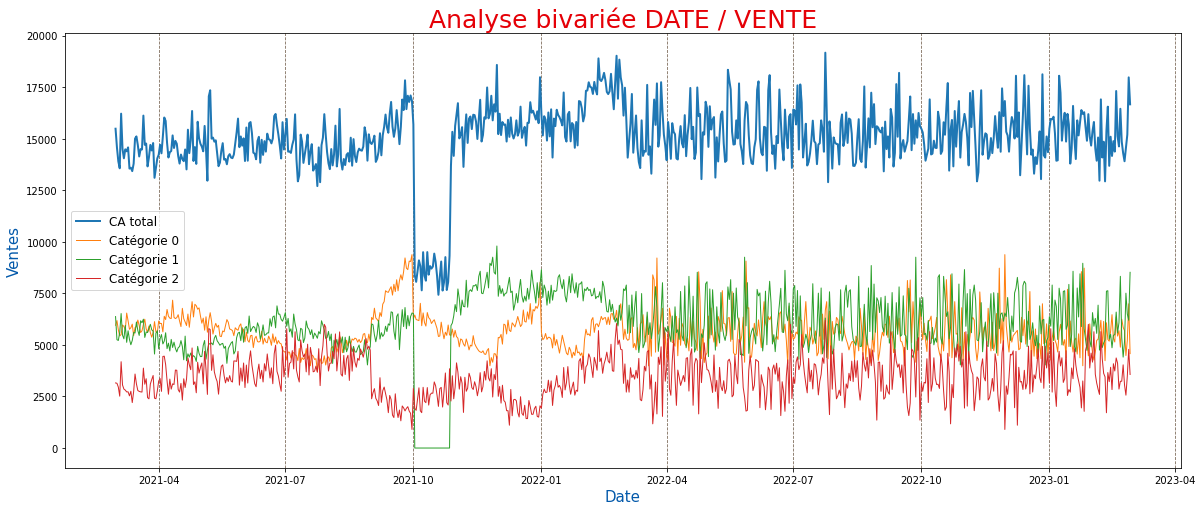

=> Problème à étudier sur les ventes en Octobre 2021 en catégorie 1 



In [40]:
# Création df avec date + vente + séparation des ventes par catégorie
vente = base.loc[:,['date','price']]
vente['categ_0'] = np.where(base['categ'] == 0 ,base['price'],0)
vente['categ_1'] = np.where(base['categ'] == 1 ,base['price'],0)
vente['categ_2'] = np.where(base['categ'] == 2 ,base['price'],0)

# Groupby par mois avec somme des prix puis tri par date
vente = vente.groupby(['date'], as_index = False)[['price','categ_0','categ_1','categ_2']].sum()
vente = vente.sort_values('date', ascending = True)

# Valeurs
date = vente['date']
tot = vente['price']
c_0 = vente['categ_0']
c_1 = vente['categ_1']
c_2 = vente['categ_2']

# Graphique courbe

plt.subplots(figsize=(20, 8))
plt.plot(date , tot , label = 'CA total', linewidth = 2)
plt.plot(date , c_0 , label = 'Catégorie 0', linewidth = 1)
plt.plot(date , c_1 , label = 'Catégorie 1', linewidth = 1)
plt.plot(date , c_2 , label = 'Catégorie 2', linewidth = 1)
plt.title("Analyse bivariée DATE / VENTE", color = '#E50007', fontsize = 25)
plt.xlabel("Date", color = '#0359AA', fontsize = 15)
plt.ylabel("Ventes", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '--' , color = '#7A6755' )
plt.legend(fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_bivariée_DATE_VENTE.png",dpi=100) 
plt.show()

print('=> Problème à étudier sur les ventes en Octobre 2021 en catégorie 1 \n')

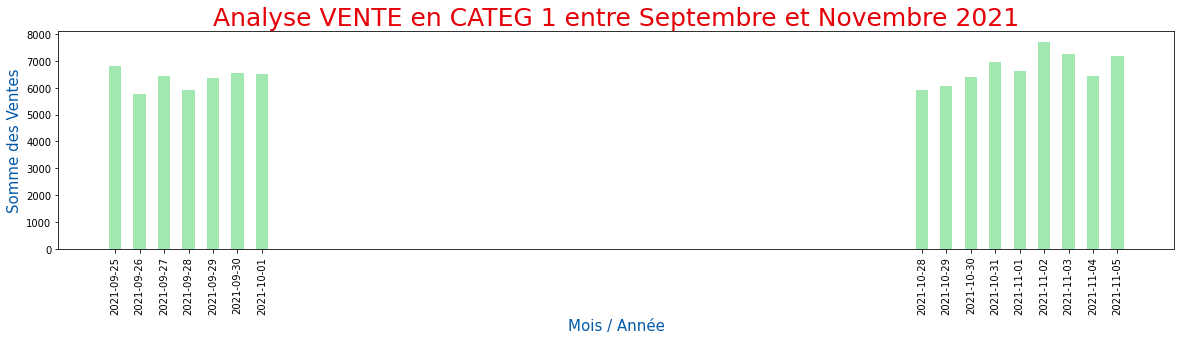

In [41]:
# Étude des ventes en Octobre 2021 de la catégorie 1
vente_categ_1 = base.loc[(base['date'] >= '2021-9-25') & (base['date'] <= '2021-11-05') & (base['categ'] == 1),:]
vente_categ_1 = vente_categ_1.groupby(['date'], as_index = False)[['price']].sum()
vente_categ_1 = vente_categ_1.sort_values('date', ascending = True)


# Graphique en barre
x_categ_1 = vente_categ_1['date']
y_categ_1 = vente_categ_1['price']
fig = plt.figure(figsize= (20,4))
plt.bar(x_categ_1,y_categ_1, color = '#A0E8AF' , width = 0.5, align = 'center')
plt.title("Analyse VENTE en CATEG 1 entre Septembre et Novembre 2021", color = '#E50007', fontsize = 25)
plt.xlabel("Mois / Année", color = '#0359AA', fontsize = 15)
plt.ylabel("Somme des Ventes", color = '#0359AA', fontsize = 15)
plt.xticks(x_categ_1 , rotation = 90)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Analyse_VENTE_CATEG_1_entre_Septembre_Novembre_2021.png",dpi=100) 
plt.show()

<font color='green'>  

**Conclusion**  
Il manque les achats du 2021-10-02 inclus au 2021-10-27 inclus  
=> suppression de toutes les données de BASE sur le mois **d'octobre 2021**

In [42]:
# Suppression des valeurs dans BASE
base = base.loc[(base['date'] < '2021-10-01') | (base['date'] > '2021-10-31') ,:]

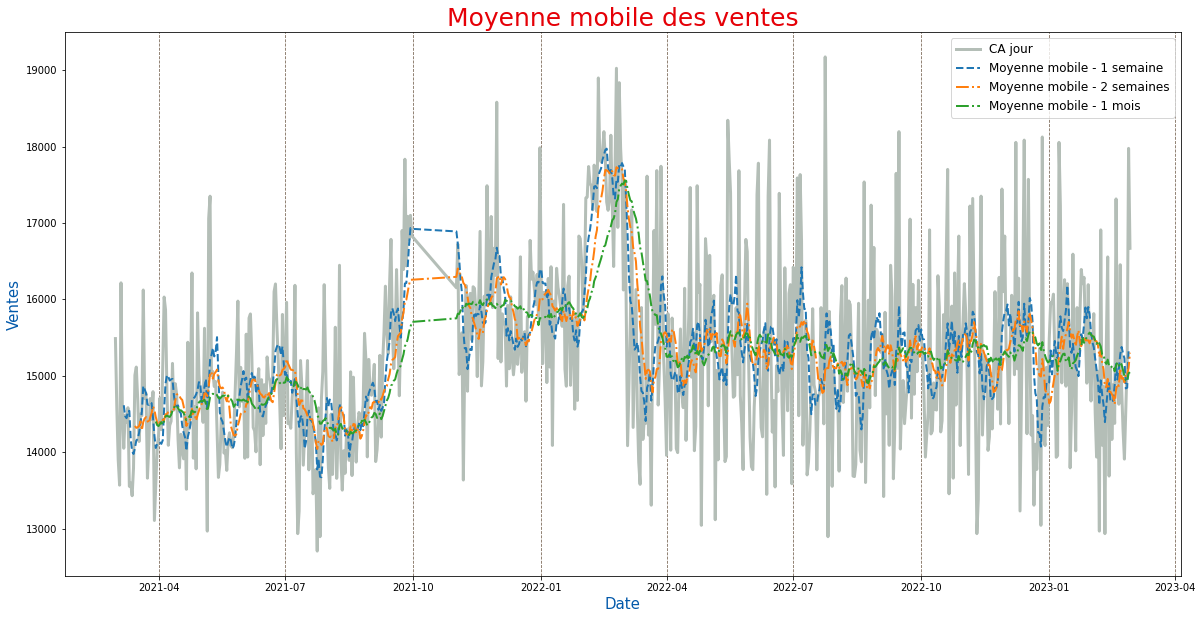

In [43]:
# Etude sur la moyenne mobile

# Création df pour CA moyenne mobile
ca_mm = base.loc[:,['date','price']]


# Groupby par mois,tri et moyenne mobile sur 7 puis 15 puis 30 jours
ca_mm = ca_mm.groupby(['date'], as_index = False)['price'].sum()
ca_mm = ca_mm.sort_values('date', ascending = True)
ca_mm['mm_1_semaine'] = ca_mm['price'].rolling(7).mean()
ca_mm['mm_2_semaine'] = ca_mm['price'].rolling(15).mean()
ca_mm['mm_1_mois'] = ca_mm['price'].rolling(30).mean()


# Valeurs pour graph
date = ca_mm['date']
tot = ca_mm['price']
mm1 = ca_mm['mm_1_semaine']
mm2 = ca_mm['mm_2_semaine']
mm3 = ca_mm['mm_1_mois']


# Graphique courbe
plt.subplots(figsize=(20, 10))
plt.plot(date , tot , label = 'CA jour', linewidth = 3 , color = '#B4BEB7')
plt.plot(date , mm1 , label = 'Moyenne mobile - 1 semaine', linewidth = 2, linestyle = '--')
plt.plot(date , mm2 , label = 'Moyenne mobile - 2 semaines', linewidth = 2, linestyle = 'dashdot')
plt.plot(date , mm3 , label = 'Moyenne mobile - 1 mois', linewidth = 2 , linestyle = '-.')
plt.title("Moyenne mobile des ventes", color = '#E50007', fontsize = 25)
plt.xlabel("Date", color = '#0359AA', fontsize = 15)
plt.ylabel("Ventes", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '--' , color = '#7A6755' )
plt.legend(fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_NETTOYAGE_Moyenne_mobile_ventes.png",dpi=100) 
plt.show()


----------------------------------------
<font color='green'>

## Finalisation


<a name="C400">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Expost CSV BASE LAPAGE
<a href="#A1"> Retour sommaire

In [44]:
# Export CSV base de données principale
base.to_csv('3 - Export CSV/Base LAPAGE.csv', index = True)

<a name="C401">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Expost CSV BASE VIDE
<a href="#A1"> Retour sommaire

In [45]:
# Export CSV base de données des produits non vendus (utilisé dans la partie RESULTAT de l'étude)
produit_vide.to_csv('3 - Export CSV/Base LAPAGE - produit non acheté.csv', index = True)

<a name="C402">
<font color='red'>_____________________________________________________________________________________________________________
<br\>

### Expost CSV BASE 4 Clients Outliers
<a href="#A1"> Retour sommaire

In [46]:
# Export CSV base de données des 4 clients effacés (inutilisé par la suite de l'étude mais données conservées au besoin)
base_client_outlier.to_csv('3 - Export CSV/Base LAPAGE - 4 clients Outliers.csv', index = True)